In [2]:
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


Let's cook up some data to apply kernel PCA recipe and compare with sklearn results to check for comprehension.

# Generating synthetic data

Lets generate data spread in a circle with a gaussian ball on the middle.

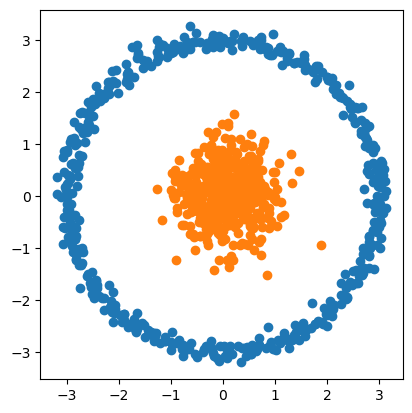

In [106]:
thetas = np.linspace(0, 2*np.pi, 500)
r = 3

x_circle  = r*np.cos(thetas) + 0.1*np.random.normal(size=thetas.size)
y_circle  = r*np.sin(thetas) + 0.1*np.random.normal(size=thetas.size)

x_gauss, y_gauss = 0.5*np.random.normal(size=(2, 500))

X = np.hstack(
    [
        np.hstack([x_circle, x_gauss])[:, np.newaxis],
        np.hstack([y_circle, y_gauss])[:, np.newaxis],
    ]
    
)

Y = np.hstack([np.ones(len(x_circle)), -1*np.ones(len(x_gauss))])

plt.scatter(x_circle, y_circle)
plt.scatter(x_gauss, y_gauss)

plt.gca().set_aspect("equal")

In [107]:
Y.shape

(1000,)

# Testing sklearn kernel pca

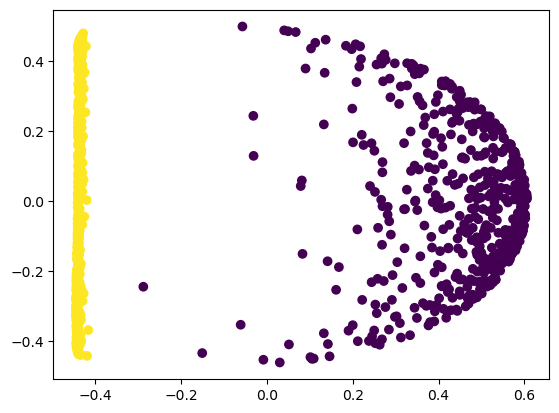

In [110]:
from sklearn.decomposition import PCA, KernelPCA


kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", fit_inverse_transform=True, alpha=0.1
)


X_kpca = kernel_pca.fit_transform(X)

x, y = X_kpca.T

plt.scatter(x, y, c=Y)

# Recipe for kernel PCA 

1. Choose a Kernel function
2. Calculate the kernel matrix
3. Center the kernel matrix
4. Solve eigenvalue problem
5. Project the data


In [76]:
# Step 1 - Choose kernel function

def k(x, y, s=1):
    return np.exp(-np.linalg.norm(x-y, ord=2, axis=1)/(2*s**2))

In [128]:
# Step 2 - Calculate the K matrix

from functools import partial

# p = np.random.permutation(np.arange(0, X.shape[0]))

# Xp = X[p]
# Yp =  Y[p]

cols = []

for i in range(0, X.shape[0]):
    cols.append(partial(k, y=X[i, :], s=1)(X))

K = np.vstack(cols)
K.shape
# k(X[1, :], X[1, :])

(1000, 1000)

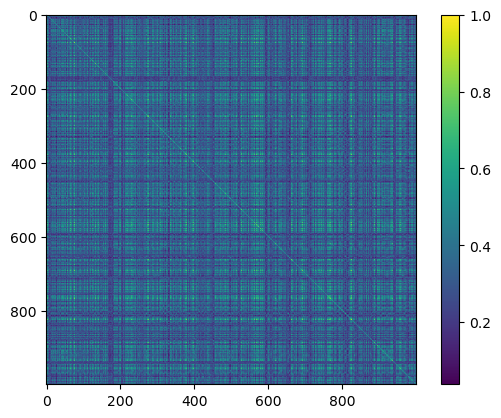

In [114]:
plt.imshow(K)
plt.colorbar()

In [129]:
# Step 3 - Calculate centered matrix

Id = (np.ones(K.shape)/K.shape[0])
K_center = K - 2*Id@K + Id@K@Id

In [130]:
# Step 4 - Calculate eigenproblem

eig_vals, eig_vec = np.linalg.eigh(K_center)

eig_vals = np.diag(eig_vals[-1::-1])
eig_vec = eig_vec[:, -1::-1]

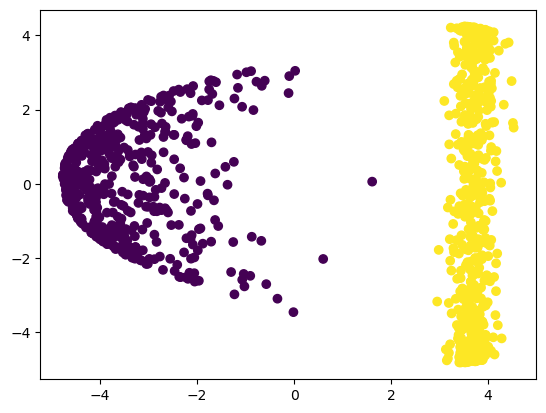

In [131]:
# T = np.ones

K_proj = K_center@eig_vec

x, y = K_proj[:, :2].T

plt.scatter(x, y, c=Y)

Great! Got similar result (but reflected) that i've got with the sklearn!